## Global Student Diversity Insights

**The hypothesis suggests a slow increase in the number of females in academic programs over the last decade. To support this idea, we'll take a close look at how many boys and girls were enrolled in different academic years using the Global_Student_Diversity_Insights database. This analysis aims to reveal noticeable patterns and differences in gender participation over specific time periods, providing useful insights into the complex dynamics of gender representation in education. The potential impact of this study goes beyond mere observation; it could help shape educational policies to create more inclusive and diverse academic environments worldwide.**

**Step 1: Import the database into VSCode and explore insights within the Global_Student_Diversity_Insights database.**

In [55]:
import os 

import numpy as np

import pandas as pd

import pymysql as mysql

import opendatasets as od

from zipfile import ZipFile

from sqlalchemy import text

import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from sqlalchemy.orm import sessionmaker

In [56]:
# Set your Kaggle API key and username
os.environ['KAGGLE_USERNAME'] = "mirnaphilip"
os.environ['KAGGLE_KEY'] = "4576ed829c0e6ffdc6c0d9278ad9d5f4"

# Correct Kaggle dataset URL
kaggle_url = "https://www.kaggle.com/webdevbadger/international-student-demographics/data"

# Use opendatasets.download function
od.download(kaggle_url, download_path='/Users/mirnaphilip/Desktop/Practical_data_engneering/project/Global-Student-Diversity-Insights', force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading international-student-demographics.zip to ./international-student-demographics


100%|██████████| 139k/139k [00:00<00:00, 1.72MB/s]

In [57]:
 # CSV files are in the following directory
dataset_path = "/Users/mirnaphilip/Desktop/Practical_data_engneering/project/Global-Student-Diversity-Insights/international-student-demographics"

# Load a CSV file into a DataFrame
academic_df = pd.read_csv(os.path.join(dataset_path, "academic.csv"))
field_of_study_df = pd.read_csv(os.path.join(dataset_path, "field_of_study.csv"))
source_of_fund_df = pd.read_csv(os.path.join(dataset_path, "source_of_fund.csv"))
academic_detail_df = pd.read_csv(os.path.join(dataset_path, "academic_detail.csv"))
origin_df = pd.read_csv(os.path.join(dataset_path, "origin.csv"))
status_df = pd.read_csv(os.path.join(dataset_path, "status.csv"))

In [58]:
# MySQL connection parameters
mysql_username = 'root'
mysql_password = '123123123'
mysql_host = 'localhost'
mysql_port = 3306
mysql_database = 'Global_Student_Diversity_Insights'

# Creating a connection to the MySQL database
engine = create_engine(f"mysql+pymysql://{mysql_username}:{mysql_password}@{mysql_host}:{mysql_port}/{mysql_database}")

In [59]:
# Load CSV files into DataFrames
csv_files = [
    'academic.csv', 'field_of_study.csv', 'source_of_fund.csv',
    'academic_detail.csv', 'origin.csv', 'status.csv'
]

for csv_file in csv_files:
    # Load CSV into DataFrame
    df = pd.read_csv(os.path.join(dataset_path, csv_file))

    # Write DataFrame to MySQL database
    table_name = csv_file.split('.')[0]
    df.to_sql(table_name, engine, index=False, if_exists='replace')

print("Data successfully loaded into MySQL database.")

Data successfully loaded into MySQL database.


In [60]:
showTable = pd.read_sql("Show Tables ", engine)
showTable

,Tables_in_global_student_diversity_insights
0,academic
1,academic_detail
2,field_of_study
3,origin
4,source_of_fund
5,status


###### The "Global_Student_Diversity_Insights" dataset consists of six tables—academic details, enrollment, field of study, student origin, funding sources, and student status—offering comprehensive insights into various aspects of global student diversity.

In [61]:
academicDetailDisplay = pd.read_sql("SELECT * FROM academic_detail;", engine)
print("Display of the table:")
academicDetailDisplay.head(3)

Display of the table:


,year,academic_type,academic_level,students
0,1999/00,Undergraduate,Associate's,59830
1,1999/00,Undergraduate,Bachelor's,177381
2,1999/00,Graduate,Master's,110857


In [62]:
academicDisplay = pd.read_sql("SELECT * FROM academic;", engine)
print("Display of the table:")
academicDisplay.head(3)

Display of the table:


,year,students,us_students,undergraduate,graduate,non_degree,opt
0,1948/49,25464,2403400.0,NaN,NaN,NaN,NaN
1,1949/50,26433,2445000.0,NaN,NaN,NaN,NaN
2,1950/51,29813,2281000.0,NaN,NaN,NaN,NaN


In [63]:
studyFieldDisplay = pd.read_sql("SELECT * FROM field_of_study;", engine)
print("Display of the table:")
studyFieldDisplay.head(3)

Display of the table:


,year,field_of_study,major,students
0,1998/99,Agriculture,Agriculture,6146.0
1,1998/99,Agriculture,Natural Resources and Conservation,1803.0
2,1998/99,Business and Management,Business and Management,101360.0


In [64]:
originDisplay = pd.read_sql("SELECT * FROM origin;", engine)
print("Display of the table:")
originDisplay.head(3)

Display of the table:


,year,origin_region,origin,academic_type,students
0,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Graduate,2
1,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Other,0
2,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Undergraduate,6


In [65]:
sourceOfFundDisplay = pd.read_sql("SELECT * FROM source_of_fund;", engine)
print("Display of the table:")
sourceOfFundDisplay.head(3)

Display of the table:


,year,academic_type,source_type,source_of_fund,students
0,1999/00,Undergraduate,International,Personal and Family,201578
1,1999/00,Undergraduate,International,Foreign Government or University,9742
2,1999/00,Undergraduate,International,Foreign Private Sponsor,6245


In [66]:
statusDisplay = pd.read_sql("SELECT * FROM status;", engine)
print("Display of the table:")
statusDisplay.head(3)

Display of the table:


,year,female,male,single,married,full_time,part_time,visa_f,visa_j,visa_other
0,2007/08,278841.0,344964.0,543958.0,79847.0,575772.0,48033.0,552691.0,31814.0,39300.0
1,2008/09,304242.0,367374.0,591694.0,79922.0,613185.0,58431.0,589007.0,39625.0,42984.0
2,2009/10,309534.0,381389.0,615612.0,75311.0,637722.0,53201.0,612158.0,38692.0,40073.0


**Step 2 Basic Overview:**

In [67]:
academicDetail = pd.read_sql("""DESCRIBE academic_detail;
""", engine)
print("The decribe table of academic detail modified:")
academicDetail

The decribe table of academic detail modified:


,Field,Type,Null,Key,Default,Extra
0,year,text,YES,,None,
1,academic_type,text,YES,,None,
2,academic_level,text,YES,,None,
3,students,bigint,YES,,None,


In [68]:
academic = pd.read_sql("""DESCRIBE academic;
""", engine)
print("The decribe table of academic modified:")
academic

The decribe table of academic modified:


,Field,Type,Null,Key,Default,Extra
0,year,text,YES,,None,
1,students,bigint,YES,,None,
2,us_students,double,YES,,None,
3,undergraduate,double,YES,,None,
4,graduate,double,YES,,None,
5,non_degree,double,YES,,None,
6,opt,double,YES,,None,


In [69]:
studyField= pd.read_sql("""DESCRIBE field_of_study;
""", engine)
print("The decribe table of field of study modified:")
studyField

The decribe table of field of study modified:


,Field,Type,Null,Key,Default,Extra
0,year,text,YES,,None,
1,field_of_study,text,YES,,None,
2,major,text,YES,,None,
3,students,double,YES,,None,


In [70]:
origin= pd.read_sql("""DESCRIBE origin;
""", engine)
print("The decribe table of origin modified:")
origin

The decribe table of origin modified:


,Field,Type,Null,Key,Default,Extra
0,year,text,YES,,None,
1,origin_region,text,YES,,None,
2,origin,text,YES,,None,
3,academic_type,text,YES,,None,
4,students,bigint,YES,,None,


In [71]:
sourceOfFund = pd.read_sql("""DESCRIBE source_of_fund;
""", engine)
print("The decribe table of source of fund modified:")
sourceOfFund

The decribe table of source of fund modified:


,Field,Type,Null,Key,Default,Extra
0,year,text,YES,,None,
1,academic_type,text,YES,,None,
2,source_type,text,YES,,None,
3,source_of_fund,text,YES,,None,
4,students,bigint,YES,,None,


In [72]:
connection = mysql.connect(
    host='localhost',
    user='root',
    password='123123123',
    database='Global_Student_Diversity_Insights'
)

# Create a cursor object
cursor = connection.cursor()

# Define the SQL statements
sql_statements = [
    "USE Global_Student_Diversity_Insights;",
    "UPDATE academic SET year = SUBSTRING(year, 1, 4);",
    "UPDATE academic_detail SET year = SUBSTRING(year, 1, 4);",
    "UPDATE field_of_study SET year = SUBSTRING(year, 1, 4);",
    "UPDATE origin SET year = SUBSTRING(year, 1, 4);",
    "UPDATE source_of_fund SET year = SUBSTRING(year, 1, 4);",
    "UPDATE status SET year = SUBSTRING(year, 1, 4);",
    "ALTER TABLE Global_Student_Diversity_Insights.academic MODIFY COLUMN year YEAR(4), MODIFY COLUMN students INT, MODIFY COLUMN us_students FLOAT, MODIFY COLUMN undergraduate FLOAT, MODIFY COLUMN graduate FLOAT, MODIFY COLUMN non_degree FLOAT, MODIFY COLUMN opt FLOAT;",
    "ALTER TABLE Global_Student_Diversity_Insights.academic_detail MODIFY COLUMN year YEAR(4), MODIFY COLUMN students INT;",
    "ALTER TABLE Global_Student_Diversity_Insights.field_of_study MODIFY COLUMN year YEAR(4), MODIFY COLUMN students DOUBLE;",
    "ALTER TABLE Global_Student_Diversity_Insights.origin MODIFY COLUMN year YEAR(4), MODIFY COLUMN students INT;",
    "ALTER TABLE Global_Student_Diversity_Insights.status MODIFY COLUMN year YEAR(4), MODIFY COLUMN female DOUBLE, MODIFY COLUMN male DOUBLE, MODIFY COLUMN single DOUBLE, MODIFY COLUMN married DOUBLE, MODIFY COLUMN full_time DOUBLE, MODIFY COLUMN part_time DOUBLE, MODIFY COLUMN visa_f DOUBLE, MODIFY COLUMN visa_j DOUBLE, MODIFY COLUMN visa_other DOUBLE;",
    "ALTER TABLE Global_Student_Diversity_Insights.source_of_fund MODIFY COLUMN year YEAR(4), MODIFY COLUMN students INT;"
]

# Execute the SQL statements
for statement in sql_statements:
    cursor.execute(statement)

# Commit the changes
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

In [73]:
# Load each table into a DataFrame for EDA
tables = ['status', 'academic', 'field_of_study', 'origin', 'source_of_fund', 'academic_detail']
for i in tables:
     # Load table into DataFrame
    dfDESCRIBE = pd.read_sql_query(f"DESCRIBE {i}", engine)
    # Display table name
    print(f"\n{i} - Basic Overview:")
    # Display Basic Overview:
    print(dfDESCRIBE)
# Close the engine connection
engine.dispose()   


status - Basic Overview:
        Field    Type Null Key Default Extra
0        year    year  YES        None      
1      female  double  YES        None      
2        male  double  YES        None      
3      single  double  YES        None      
4     married  double  YES        None      
5   full_time  double  YES        None      
6   part_time  double  YES        None      
7      visa_f  double  YES        None      
8      visa_j  double  YES        None      
9  visa_other  double  YES        None      

academic - Basic Overview:
           Field   Type Null Key Default Extra
0           year   year  YES        None      
1       students    int  YES        None      
2    us_students  float  YES        None      
3  undergraduate  float  YES        None      
4       graduate  float  YES        None      
5     non_degree  float  YES        None      
6            opt  float  YES        None      

field_of_study - Basic Overview:
            Field    Type Null Key Defaul

**Step 3 Summary Statistics**

In [74]:
# Load each table into a DataFrame for EDA
tables = ['status', 'academic', 'field_of_study', 'origin', 'source_of_fund', 'academic_detail']
for i in tables:
     # Load table into DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {i}", engine)
    # Display table name
    print(f"\n{i} - Summary Statistics:")
    # Display summary statistics
    print(df.describe())
# Close the engine connection
engine.dispose()    


status - Summary Statistics:
              year         female           male        single        married  \
count    16.000000      16.000000      16.000000  1.600000e+01      16.000000   
mean   2014.500000  400165.875000  503758.375000  8.186190e+05   85305.250000   
std       4.760952   71337.004816   96374.058647  1.594363e+05    9826.503247   
min    2007.000000  278841.000000  344964.000000  5.439580e+05   69435.000000   
25%    2010.750000  334648.750000  419541.750000  6.812148e+05   78660.500000   
50%    2014.500000  416864.500000  513098.500000  8.442555e+05   87051.500000   
75%    2018.250000  471179.500000  593386.750000  9.674375e+05   91414.000000   
max    2022.000000  480836.000000  617463.000000  1.002199e+06  107882.000000   

          full_time     part_time        visa_f        visa_j    visa_other  
count  1.600000e+01     16.000000  1.600000e+01     16.000000     16.000000  
mean   8.431138e+05  60810.500000  8.276002e+05  40853.562500  35470.500000  
std   

**Step 4 Missing Values:**

In [75]:
for table in tables:
    # Load table into DataFrame
    df = pd.read_sql_table(table, engine)
    # Check for missing values
    print(f"\n{table} - Missing Values:")
    print(df.isnull().sum())

# Close the engine connection
engine.dispose()


status - Missing Values:
year          0
female        0
male          0
single        0
married       0
full_time     0
part_time     0
visa_f        0
visa_j        0
visa_other    0
dtype: int64

academic - Missing Values:
year              0
students          0
us_students       3
undergraduate    26
graduate         26
non_degree       31
opt              31
dtype: int64

field_of_study - Missing Values:
year               0
field_of_study     0
major              0
students          38
dtype: int64

origin - Missing Values:
year             0
origin_region    0
origin           0
academic_type    0
students         0
dtype: int64

source_of_fund - Missing Values:
year              0
academic_type     0
source_type       0
source_of_fund    0
students          0
dtype: int64

academic_detail - Missing Values:
year              0
academic_type     0
academic_level    0
students          0
dtype: int64


In [76]:
connection = mysql.connect(
    host='localhost',
    user='root',
    password='123123123',
    database='Global_Student_Diversity_Insights'
)

# Create a cursor object
cursor = connection.cursor()
# Define the SQL statements for updating missing values
sql_statements = [
    "USE Global_Student_Diversity_Insights;",
    "CREATE TEMPORARY TABLE temp_avg AS (SELECT AVG(us_students) AS avg_us_students FROM academic);",
    "UPDATE academic SET us_students = COALESCE(us_students, (SELECT avg_us_students FROM temp_avg));",
    "DROP TEMPORARY TABLE IF EXISTS temp_avg;",
    "CREATE TEMPORARY TABLE temp_avg AS (SELECT AVG(undergraduate) AS avg_undergraduate FROM academic);",
    "UPDATE academic SET undergraduate = COALESCE(undergraduate, (SELECT avg_undergraduate FROM temp_avg));",
    "DROP TEMPORARY TABLE IF EXISTS temp_avg;",
    "CREATE TEMPORARY TABLE temp_avg AS (SELECT AVG(graduate) AS avg_graduate FROM academic);",
    "UPDATE academic SET graduate = COALESCE(graduate, (SELECT avg_graduate FROM temp_avg));",
    "DROP TEMPORARY TABLE IF EXISTS temp_avg;",
    "CREATE TEMPORARY TABLE temp_avg AS (SELECT AVG(non_degree) AS avg_non_degree FROM academic);",
    "UPDATE academic SET non_degree = COALESCE(non_degree, (SELECT avg_non_degree FROM temp_avg));",
    "DROP TEMPORARY TABLE IF EXISTS temp_avg;",
    "CREATE TEMPORARY TABLE temp_avg AS (SELECT AVG(opt) AS avg_opt FROM academic);",
    "UPDATE academic SET opt = COALESCE(opt, (SELECT avg_opt FROM temp_avg));",
    "DROP TEMPORARY TABLE IF EXISTS temp_avg;",
    "CREATE TEMPORARY TABLE temp_avg AS (SELECT AVG(students) AS avg_students FROM field_of_study);",
    "UPDATE field_of_study SET students = COALESCE(students, (SELECT avg_students FROM temp_avg));",
    "DROP TEMPORARY TABLE IF EXISTS temp_avg;"
]

# Execute the SQL statements
for statement in sql_statements:
    cursor.execute(statement)

# Commit the changes
connection.commit()

# Close the cursor and connection
cursor.close()
connection.close()

In [77]:
for table in tables:
    # Load table into DataFrame
    df = pd.read_sql_table(table, engine)
    # Check for missing values
    print(f"\n{table} - Missing Values:")
    print(df.isnull().sum())

# Close the engine connection
engine.dispose()


status - Missing Values:
year          0
female        0
male          0
single        0
married       0
full_time     0
part_time     0
visa_f        0
visa_j        0
visa_other    0
dtype: int64

academic - Missing Values:
year             0
students         0
us_students      0
undergraduate    0
graduate         0
non_degree       0
opt              0
dtype: int64

field_of_study - Missing Values:
year              0
field_of_study    0
major             0
students          0
dtype: int64

origin - Missing Values:
year             0
origin_region    0
origin           0
academic_type    0
students         0
dtype: int64

source_of_fund - Missing Values:
year              0
academic_type     0
source_type       0
source_of_fund    0
students          0
dtype: int64

academic_detail - Missing Values:
year              0
academic_type     0
academic_level    0
students          0
dtype: int64


**Step 5 Data Transformation**

In [78]:
sourceOfFundDisplay['year'] = sourceOfFundDisplay['year'].str[:4]
academicDetailDisplay['year'] = academicDetailDisplay['year'].str[:4]
academicDisplay['year'] = academicDisplay['year'].str[:4]
studyFieldDisplay['year'] = studyFieldDisplay['year'].str[:4]
originDisplay['year'] = originDisplay['year'].str[:4]
statusDisplay['year'] = statusDisplay['year'].str[:4]

In [79]:
# Calculate Female Percentage and update the DataFrame
statusDisplay['female_percentage'] = (statusDisplay['female'] / (statusDisplay['female'] + statusDisplay['male'])) * 100

# Use the 'if_exists' parameter to replace the existing 'status_modified' table
statusDisplay.to_sql('status', engine, if_exists='replace', index=False)

# Now, retrieve and display the updated table
updated_status = pd.read_sql("SELECT * FROM status;", engine)
updated_status.head()

,year,female,male,single,married,full_time,part_time,visa_f,visa_j,visa_other,female_percentage
0,2007,278841.0,344964.0,543958.0,79847.0,575772.0,48033.0,552691.0,31814.0,39300.0,44.700026
1,2008,304242.0,367374.0,591694.0,79922.0,613185.0,58431.0,589007.0,39625.0,42984.0,45.299993
2,2009,309534.0,381389.0,615612.0,75311.0,637722.0,53201.0,612158.0,38692.0,40073.0,44.800072
3,2010,322582.0,400695.0,653842.0,69435.0,669031.0,54246.0,645163.0,40504.0,37610.0,44.600063
4,2011,338671.0,425824.0,690339.0,74156.0,714038.0,50457.0,688810.0,42047.0,33638.0,44.299963


**Step 6 Statistical Analysis**

In [80]:
# Total Enrollment Over the Years:
total_enrollment = pd.read_sql_query(
    """
    SELECT year, SUM(female) AS total_female, SUM(male) AS total_male
    FROM status
    GROUP BY year
    ORDER BY year;
    """, engine)

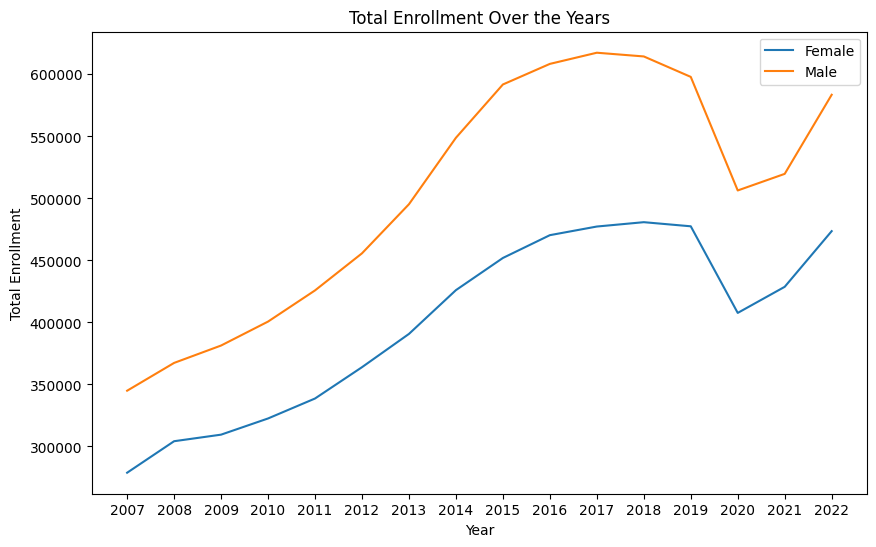

In [81]:
# Plot Total Enrollment Over the Years
plt.figure(figsize=(10, 6))
plt.plot(total_enrollment['year'], total_enrollment['total_female'], label='Female')
plt.plot(total_enrollment['year'], total_enrollment['total_male'], label='Male')
plt.title('Total Enrollment Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.legend()
plt.show()

In [82]:
# Total Enrollment Over the Years:
total_enrollment = pd.read_sql_query(
    """
    SELECT
    year,
    ROUND(total_female / (total_female + total_male) * 100, 2) AS female_percentage
FROM
    (
        SELECT
            year,
            SUM(female) AS total_female,
            SUM(male) AS total_male
        FROM
            status
        GROUP BY
            year
        ORDER BY
            year
    ) AS total_enrollment;


    """, engine)
total_enrollment

,year,female_percentage
0,2007,44.7
1,2008,45.3
2,2009,44.8
3,2010,44.6
4,2011,44.3
5,2012,44.4
6,2013,44.1
7,2014,43.7
8,2015,43.3
9,2016,43.6


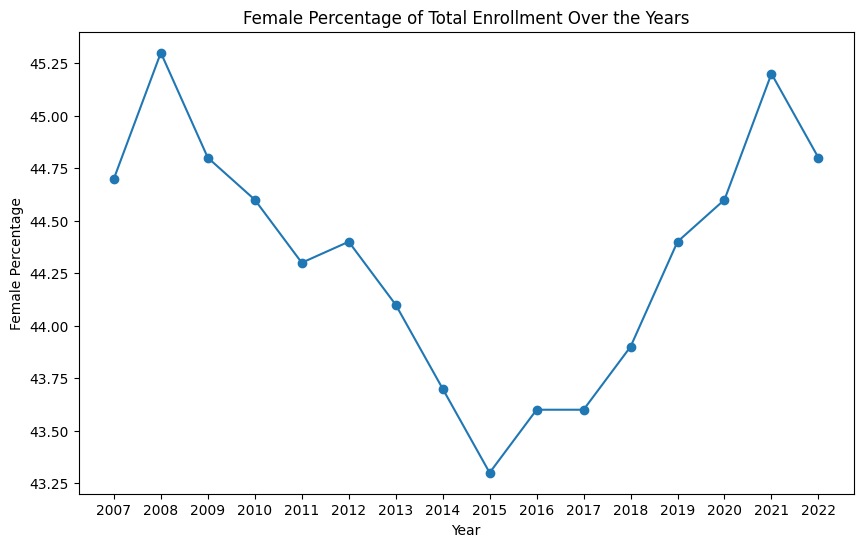

In [83]:
# Plot Total Enrollment Over the Years
plt.figure(figsize=(10, 6))
plt.plot(total_enrollment['year'], total_enrollment['female_percentage'], marker='o')
plt.title('Female Percentage of Total Enrollment Over the Years')
plt.xlabel('Year')
plt.ylabel('Female Percentage')
plt.show()

In [84]:
# Average Female Percentage Over the Entire Period:
average_gender_percentage  = pd.read_sql_query(
    """
    SELECT
    AVG(total_female / (total_female + total_male) * 100) AS average_female_percentage,
    AVG(total_male / (total_female + total_male) * 100) AS average_male_percentage
FROM (
    SELECT
        SUM(female) AS total_female,
        SUM(male) AS total_male
    FROM status
) AS total_enrollment;

    """, engine)
average_gender_percentage 

,average_female_percentage,average_male_percentage
0,44.269846,55.730154


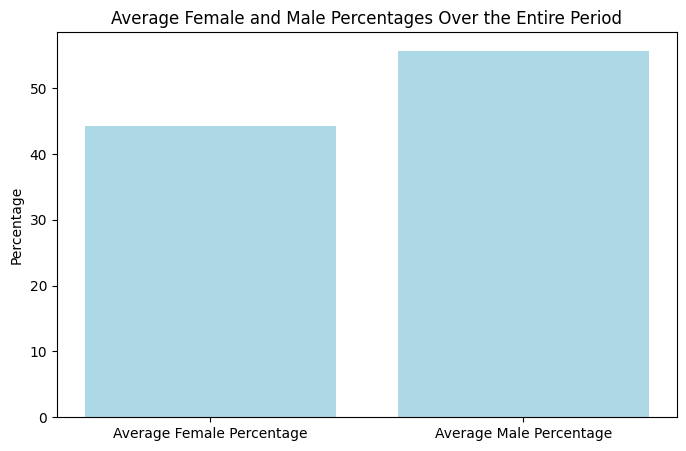

In [85]:
# Plot Average Female and Male Percentages
plt.figure(figsize=(8, 5))
plt.bar(['Average Female Percentage', 'Average Male Percentage'],
        [average_gender_percentage['average_female_percentage'].iloc[0],
         average_gender_percentage['average_male_percentage'].iloc[0]], color = 'lightblue')
plt.title('Average Female and Male Percentages Over the Entire Period')
plt.ylabel('Percentage')
plt.show()

In [86]:
# Yearly Change in Female Percentage:
yearly_change =  pd.read_sql_query(
    """
    SELECT
    year,
    ROUND(
        (LEAD(total_female / (total_female + total_male) * 100) OVER (ORDER BY year) -
         total_female / (total_female + total_male) * 100), 2) AS change_in_female_percentage
FROM (
    SELECT
        year,
        SUM(female) AS total_female,
        SUM(male) AS total_male
    FROM
        status
    GROUP BY
        year
    ORDER BY
        year
) AS total_enrollment;

    """, engine)
yearly_change 

,year,change_in_female_percentage
0,2007,0.6
1,2008,-0.5
2,2009,-0.2
3,2010,-0.3
4,2011,0.1
5,2012,-0.3
6,2013,-0.4
7,2014,-0.4
8,2015,0.3
9,2016,0.0


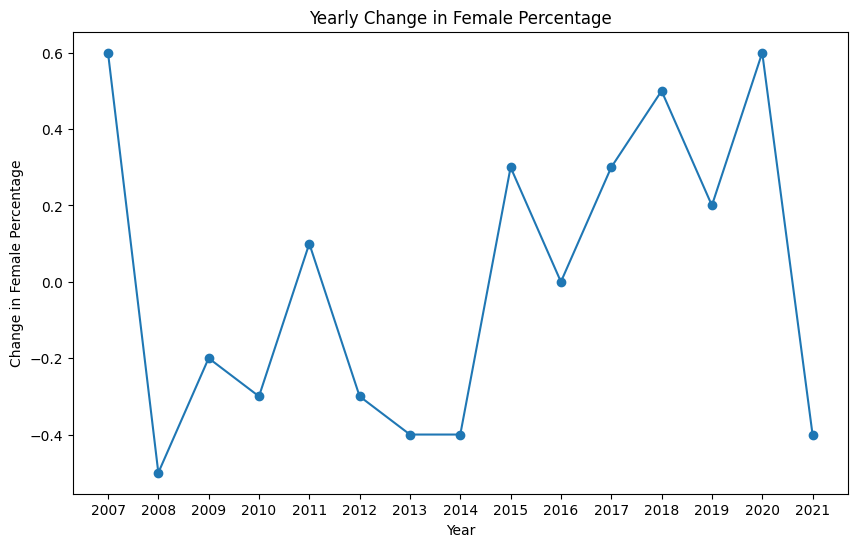

In [87]:
# Plot Yearly Change in Female Percentage
plt.figure(figsize=(10, 6))
plt.plot(yearly_change['year'], yearly_change['change_in_female_percentage'], marker='o')
plt.title('Yearly Change in Female Percentage')
plt.xlabel('Year')
plt.ylabel('Change in Female Percentage')
plt.show()

In [88]:
# Year with the Highest Female Percentage:
highest_female_percentage = pd.read_sql_query(
    """
    SELECT
    year,
    female_percentage
FROM (
    SELECT
        year,
        ROUND(SUM(female) / (SUM(female) + SUM(male)) * 100, 2) AS female_percentage
    FROM
        status
    GROUP BY
        year
    ORDER BY
        female_percentage DESC
    LIMIT 1
) AS year_with_highest_female_percentage;

    """, engine)
highest_female_percentage

,year,female_percentage
0,2008,45.3


**Step 7 Create View:**

In [91]:
mysql_username = 'root'
mysql_password = '123123123'
mysql_host = 'localhost'
mysql_port = 3306
mysql_database = 'Global_Student_Diversity_Insights'

# Create a connection to the MySQL database
engine = create_engine(f"mysql+pymysql://{mysql_username}:{mysql_password}@{mysql_host}:{mysql_port}/{mysql_database}")

# SQL query to create the view for Total Students Gender
create_view_query = """
CREATE VIEW Total_Students_Gender AS
SELECT
    a.year,
    a.students AS total_students,
    s.female,
    s.male
FROM
    academic a
JOIN
    status s ON a.year = s.year;
"""

# Use the text method to define the SQL statement
create_view_stmt = text(create_view_query)

# Execute the SQL query to create the view
with engine.connect() as connection:
    connection.execute(create_view_stmt)

# SQL query to retrieve data from the created view
view_query = "SELECT * FROM Total_Students_Gender;"

# Read the view data into a DataFrame
view_data = pd.read_sql(view_query, engine)

# Display the DataFrame
print(view_data)

    year  total_students    female      male
0   2007          623805  278841.0  344964.0
1   2008          671616  304242.0  367374.0
2   2009          690923  309534.0  381389.0
3   2010          723277  322582.0  400695.0
4   2011          764495  338671.0  425824.0
5   2012          819644  363922.0  455722.0
6   2013          886052  390749.0  495303.0
7   2014          974926  426043.0  548883.0
8   2015         1043839  451982.0  591857.0
9   2016         1078822  470366.0  608456.0
10  2017         1094792  477329.0  617463.0
11  2018         1095299  480836.0  614463.0
12  2019         1075496  477520.0  597976.0
13  2020          914095  407686.0  506409.0
14  2021          948519  428731.0  519788.0
15  2022         1057188  473620.0  583568.0


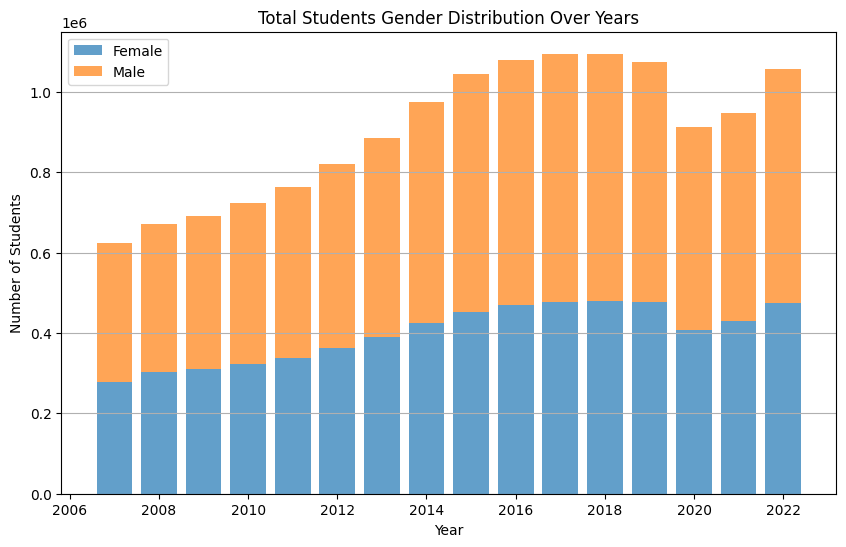

In [93]:
# Plotting the data as a bar graph
plt.figure(figsize=(10, 6))
plt.bar(view_data['year'], view_data['female'], label='Female', alpha=0.7)
plt.bar(view_data['year'], view_data['male'], bottom=view_data['female'], label='Male', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Number of Students')
plt.title('Total Students Gender Distribution Over Years')
plt.legend()
plt.grid(axis='y')
plt.show()